**Problem** **Statement**:

Build a sentiment analysis model to analyze customer reviews ans feedback for a hospitality company. The model should be able to classify reviews as positive, negative, or neutral, and identify key topics or areas of concern.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [4]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv", on_bad_lines='skip')


In [7]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
data.shape

(20491, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [11]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None


In [12]:
print(data.isnull().sum())


Review    0
Rating    0
dtype: int64


In [13]:
print(data.describe())

             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [14]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
5,love monaco staff husband stayed hotel crazy w...,5,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5,748
7,"excellent staff, housekeeping quality hotel ch...",4,597
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419
9,excellent stayed hotel monaco past w/e delight...,5,271


**Distribution of Ratings**:

Distribution of the ratings to see how they are spread across different values.

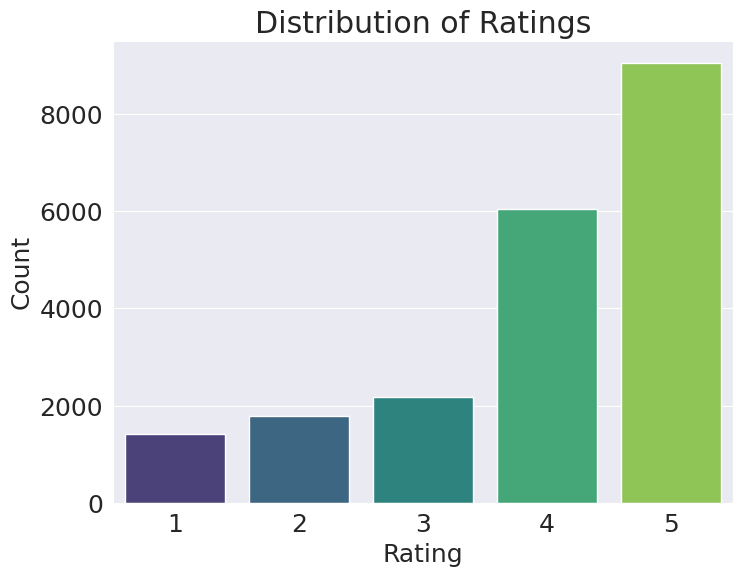

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**Sentiment Assignment:**

Assign sentiments (positive, neutral, negative) based on the ratings. Typically, ratings 1-2 can be considered negative, 3 as neutral, and 4-5 as positive.

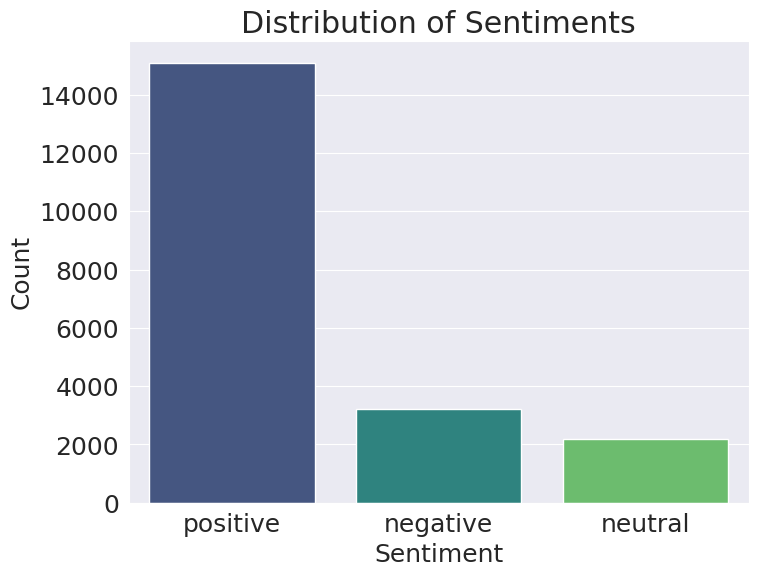

In [16]:
def assign_sentiment(rating):
    if rating in [4, 5]:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'


data['Sentiment'] = data['Rating'].apply(assign_sentiment)


plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [17]:
data.head()


,Review,Rating,Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,positive
1,ok nothing special charge diamond member hilto...,2,1689,negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,positive


In [18]:
data.head()

,Review,Rating,Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,positive
1,ok nothing special charge diamond member hilto...,2,1689,negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,positive


**Text Preprocessing:**

Clean and preprocess the review texts to prepare them for analysis.

In [19]:
import re
import string
from nltk.corpus import stopwords


import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


data['Cleaned_Review'] = data['Review'].apply(clean_text)


print(data[['Review', 'Cleaned_Review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [20]:
data.head()

,Review,Rating,Length,Sentiment,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,593,positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,1689,negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,600,positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1281,positive,great stay great stay went seahawk game awesom...


**Word Cloud for Visualization:**

Visualize the most common words in positive, negative, and neutral reviews using word clouds.

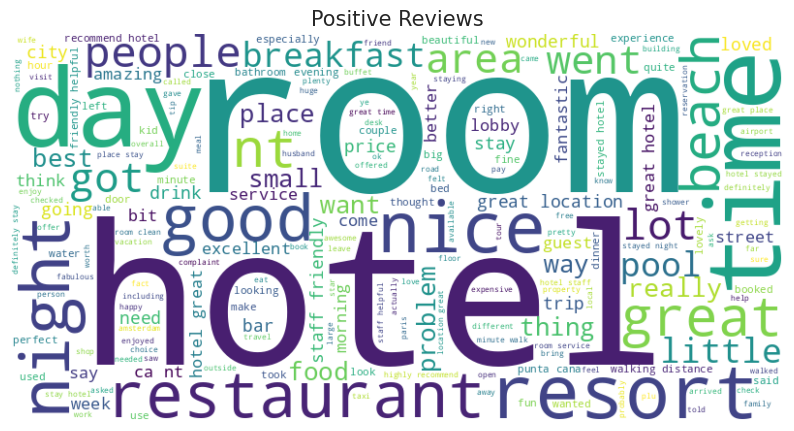

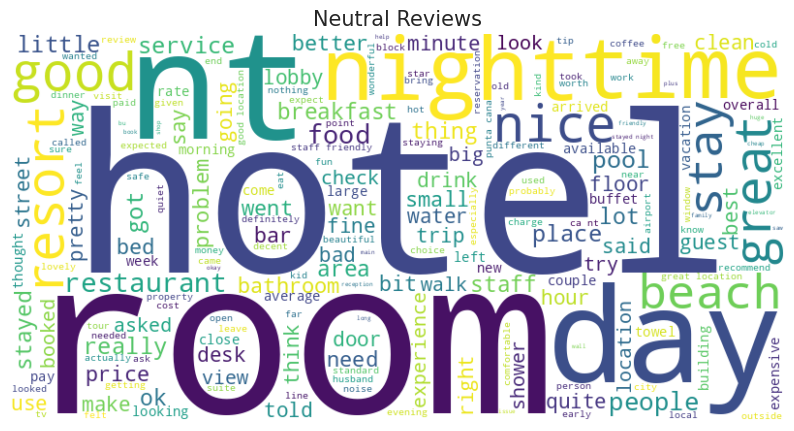

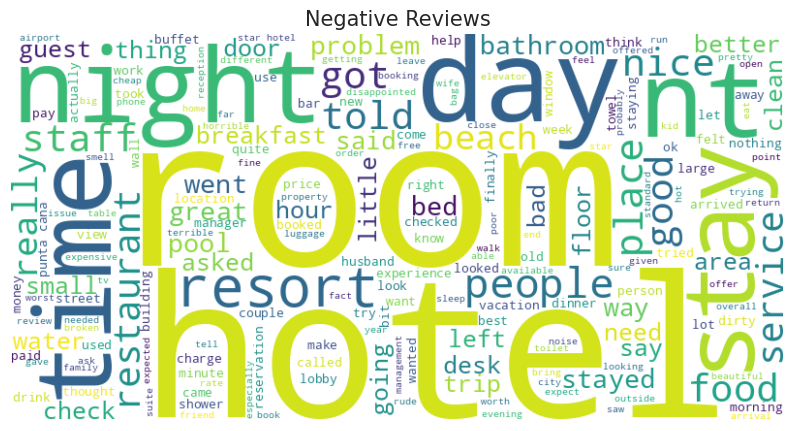

In [21]:
from wordcloud import WordCloud


def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


positive_reviews = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_reviews = ' '.join(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_reviews = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

create_wordcloud(positive_reviews, 'Positive Reviews')
create_wordcloud(neutral_reviews, 'Neutral Reviews')
create_wordcloud(negative_reviews, 'Negative Reviews')


**Common Words and Bigrams:**

Identify the most common words and bigrams (two-word combinations) in the reviews.

In [22]:
from collections import Counter
from nltk.util import ngrams


def get_common_words(texts, num=20):
    all_words = ' '.join(texts).split()
    common_words = Counter(all_words).most_common(num)
    return common_words


positive_words = get_common_words(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_words = get_common_words(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_words = get_common_words(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

print("Common words in positive reviews:", positive_words)
print("Common words in neutral reviews:", neutral_words)
print("Common words in negative reviews:", negative_words)


def get_common_bigrams(texts, num=20):
    all_bigrams = list(ngrams(' '.join(texts).split(), 2))
    common_bigrams = Counter(all_bigrams).most_common(num)
    return common_bigrams


positive_bigrams = get_common_bigrams(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_bigrams = get_common_bigrams(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_bigrams = get_common_bigrams(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

print("Common bigrams in positive reviews:", positive_bigrams)
print("Common bigrams in neutral reviews:", neutral_bigrams)
print("Common bigrams in negative reviews:", negative_bigrams)


Common words in positive reviews: [('hotel', 35998), ('room', 22333), ('great', 18105), ('staff', 12486), ('good', 12423), ('nt', 12365), ('stay', 11163), ('nice', 9240), ('location', 8704), ('rooms', 8282), ('stayed', 7867), ('clean', 7301), ('breakfast', 7220), ('time', 6967), ('beach', 6837), ('service', 6817), ('day', 6386), ('night', 6184), ('food', 6141), ('really', 5698)]
Common words in neutral reviews: [('hotel', 5061), ('room', 4437), ('nt', 2591), ('good', 2458), ('great', 1754), ('nice', 1743), ('rooms', 1483), ('staff', 1473), ('stay', 1413), ('location', 1406), ('beach', 1266), ('night', 1223), ('food', 1165), ('clean', 1155), ('like', 1121), ('time', 1113), ('service', 1109), ('stayed', 1099), ('day', 1085), ('resort', 1049)]
Common words in negative reviews: [('hotel', 7773), ('room', 7530), ('nt', 4033), ('stay', 2577), ('rooms', 2250), ('staff', 2244), ('good', 2091), ('service', 2035), ('night', 2016), ('day', 1869), ('time', 1736), ('like', 1714), ('food', 1684), ('

**Correlation Between Review Text and Rating:**

Check if there's any correlation between the length of the review text and the rating given.

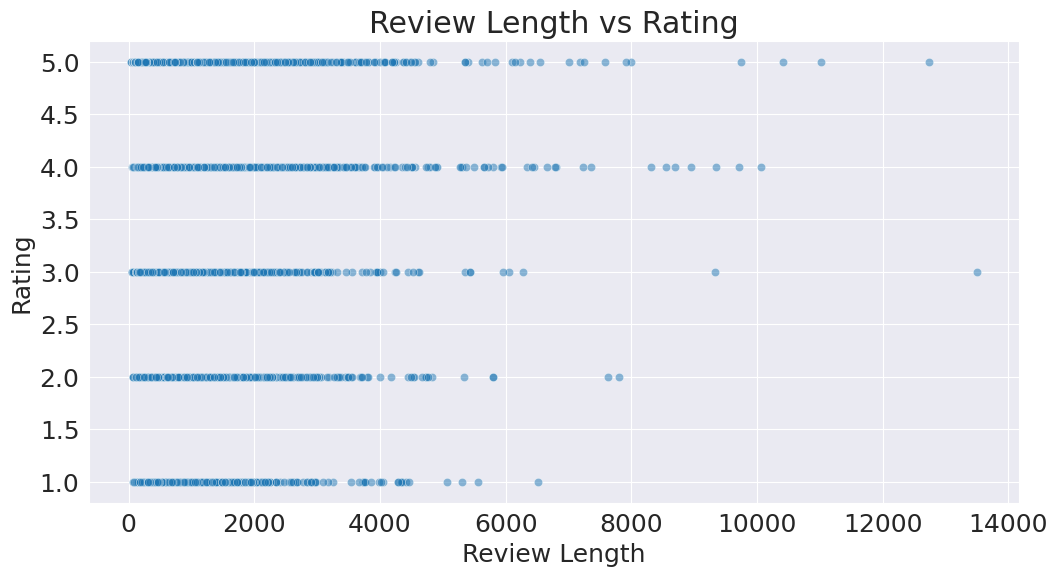

Correlation between review length and rating:
           Length    Rating
Length  1.000000 -0.080565
Rating -0.080565  1.000000


In [23]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Length', y='Rating', data=data, alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()


correlation = data[['Length', 'Rating']].corr()
print("Correlation between review length and rating:\n", correlation)


**Analyze Reviews with High and Low Ratings:**

Compare reviews with the highest and lowest ratings to see if there are distinct differences.

In [24]:

high_rating_reviews = data[data['Rating'] == 5]['Review'].sample(5, random_state=42)
low_rating_reviews = data[data['Rating'] == 1]['Review'].sample(5, random_state=42)

print("Sample reviews with the highest ratings:\n", high_rating_reviews)
print("\nSample reviews with the lowest ratings:\n", low_rating_reviews)


Sample reviews with the highest ratings:
 7785     beautiful hotel n't know happened poor couple ...
4365     finest hotel experience fiance decided celebra...
16844    budget hotel high end quality learned quickly ...
10507    loved just spent week seven bridges nov 28 dec...
9963     loved du cadran, great time hotel du cadran, s...
Name: Review, dtype: object

Sample reviews with the lowest ratings:
 453      old rude blah reason stayed jacuzzi suite, wis...
3128     hated, just got punta cana stayed melia caribe...
8606     absolutely horrible stayed 30th august jolly c...
12778    problems way stayed 2 nights, property not bad...
4072     tourists stay away bad address unless want roc...
Name: Review, dtype: object


**Bi-gram:**

A bi-gram is a sequence of two adjacent words in a text document. By considering bi-grams, we capture the relationship between pairs of words and identify patterns that may not be apparent when analyzing individual words alone. For example, in the sentence "The quick brown fox jumps over the lazy dog," the bi-grams would be "The quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over the", "the lazy", and "lazy dog."

In [25]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Review'])

In [26]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

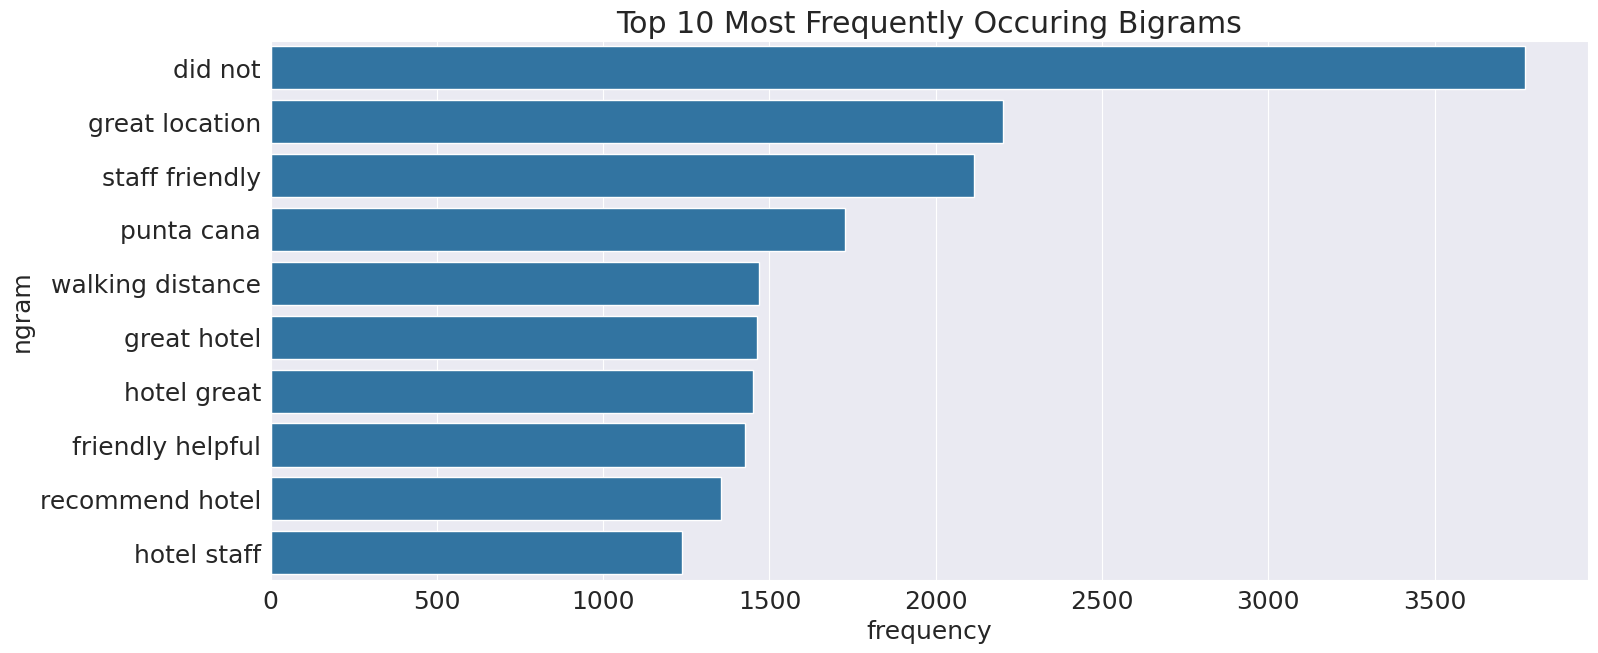

In [27]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

**Tri-gram:**

A tri-gram is a sequence of three adjacent words in a text document. Similar to bi-grams, tri-grams capture the relationship between triplets of words and provide deeper context and understanding of the text. For example, in the same sentence "The quick brown fox jumps over the lazy dog," the tri-grams would be "The quick brown", "quick brown fox", "brown fox jumps", "fox jumps over", "jumps over the", "over the lazy", and "the lazy dog."

In [28]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(data['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

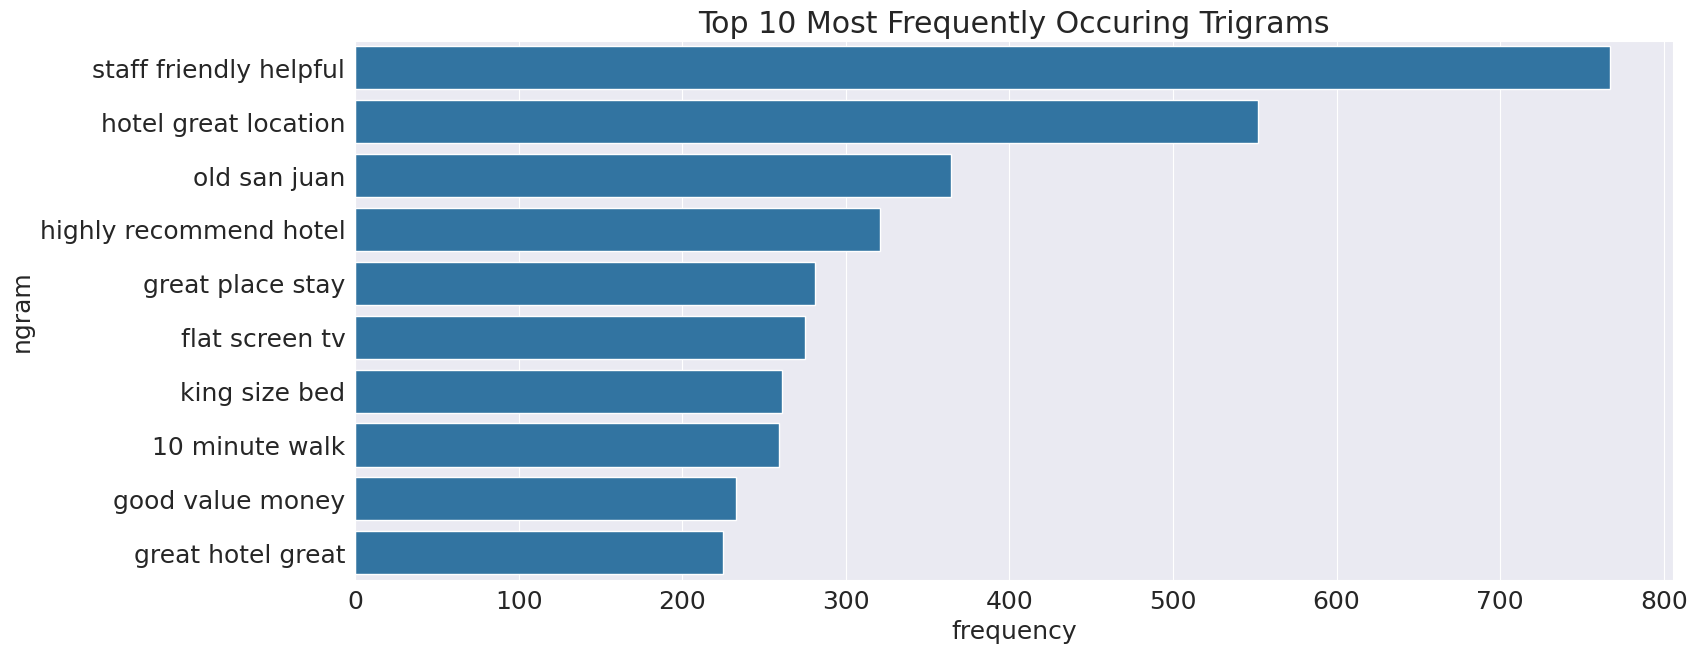

In [29]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [30]:
data.head(10)

,Review,Rating,Length,Sentiment,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,593,positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,1689,negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,600,positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1281,positive,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,1002,positive,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,positive,cozy stay rainy city husband spent nights mona...
7,"excellent staff, housekeeping quality hotel ch...",4,597,positive,excellent staff housekeeping quality hotel cho...
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,positive,hotel stayed hotel monaco cruise rooms generou...
9,excellent stayed hotel monaco past w/e delight...,5,271,positive,excellent stayed hotel monaco past delight rec...


In [31]:

# Step 1: Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['Cleaned_Review'], vector_size=100, window=5, min_count=1, workers=4)

In [32]:
# Step 2: Feature Extraction
def get_average_embedding(review_tokens):
    embeddings = []
    for token in review_tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return sum(embeddings) / len(embeddings)
    else:
        return [0] * 100  # Return zero vector if no embeddings found

data['Word2Vec_Embedding'] = data['Cleaned_Review'].apply(get_average_embedding)

In [33]:
data.head()

,Review,Rating,Length,Sentiment,Cleaned_Review,Word2Vec_Embedding
0,nice hotel expensive parking got good deal sta...,4,593,positive,nice hotel expensive parking got good deal sta...,"[-0.08591715, 0.037949838, 0.11101378, 0.01007..."
1,ok nothing special charge diamond member hilto...,2,1689,negative,ok nothing special charge diamond member hilto...,"[-0.06403561, 0.018008925, 0.11418491, -0.0269..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral,nice rooms experience hotel monaco seattle goo...,"[-0.06396191, 0.03131508, 0.10990749, -0.01584..."
3,"unique, great stay, wonderful time hotel monac...",5,600,positive,unique great stay wonderful time hotel monaco ...,"[-0.09212979, 0.015502816, 0.122977406, -0.024..."
4,"great stay great stay, went seahawk game aweso...",5,1281,positive,great stay great stay went seahawk game awesom...,"[-0.063299246, 0.02704769, 0.11323563, -0.0234..."


In [34]:
from sklearn.preprocessing import LabelEncoder

# Label encode the target variable
label_encoder = LabelEncoder()

data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])



  # Step 3: Model Training
X = pd.DataFrame(data['Word2Vec_Embedding'].tolist())
y = data['Sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
data.head(10)

,Review,Rating,Length,Sentiment,Cleaned_Review,Word2Vec_Embedding
0,nice hotel expensive parking got good deal sta...,4,593,2,nice hotel expensive parking got good deal sta...,"[-0.08591715, 0.037949838, 0.11101378, 0.01007..."
1,ok nothing special charge diamond member hilto...,2,1689,0,ok nothing special charge diamond member hilto...,"[-0.06403561, 0.018008925, 0.11418491, -0.0269..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,1,nice rooms experience hotel monaco seattle goo...,"[-0.06396191, 0.03131508, 0.10990749, -0.01584..."
3,"unique, great stay, wonderful time hotel monac...",5,600,2,unique great stay wonderful time hotel monaco ...,"[-0.09212979, 0.015502816, 0.122977406, -0.024..."
4,"great stay great stay, went seahawk game aweso...",5,1281,2,great stay great stay went seahawk game awesom...,"[-0.063299246, 0.02704769, 0.11323563, -0.0234..."
5,love monaco staff husband stayed hotel crazy w...,5,1002,2,love monaco staff husband stayed hotel crazy w...,"[-0.07863551, 0.023221634, 0.122352675, -0.028..."
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,2,cozy stay rainy city husband spent nights mona...,"[-0.08276399, 0.026088342, 0.11365642, -0.0092..."
7,"excellent staff, housekeeping quality hotel ch...",4,597,2,excellent staff housekeeping quality hotel cho...,"[-0.09670383, -0.0034724148, 0.10260693, -0.03..."
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,2,hotel stayed hotel monaco cruise rooms generou...,"[-0.075933166, 0.027523926, 0.1139007, -0.0378..."
9,excellent stayed hotel monaco past w/e delight...,5,271,2,excellent stayed hotel monaco past delight rec...,"[-0.06885395, -0.0028760782, 0.11658625, -0.03..."


In [36]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

In [37]:
# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        results[model_name] = {
            "Accuracy": accuracy,
            "Classification Report": class_report
        }
        print(f"{model_name} Accuracy: {accuracy:.4f}")
        print(f"{model_name} Classification Report:\n{class_report}\n")

    return results

# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

K-Nearest Neighbors Accuracy: 0.7026
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.28      0.31       625
           1       0.12      0.05      0.07       432
           2       0.78      0.88      0.83      3042

    accuracy                           0.70      4099
   macro avg       0.42      0.40      0.40      4099
weighted avg       0.65      0.70      0.67      4099


Support Vector Machine Accuracy: 0.7421
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       625
           1       0.00      0.00      0.00       432
           2       0.74      1.00      0.85      3042

    accuracy                           0.74      4099
   macro avg       0.25      0.33      0.28      4099
weighted avg       0.55      0.74      0.63      4099


Naive Bayes Accuracy: 0.5677
Naive Bayes Classification Report:
      

Since XGBoost has given you the best accuracy, let's proceed with model building and hyperparameter tuning for XGBoost. We'll use the GridSearchCV function from scikit-learn to find the optimal hyperparameters.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Hyperparameter tuning for XGBoost using GridSearchCV
# Hyperparameter tuning for XGBoost using RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{class_report}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.8184644554526709, 'learning_rate': 0.06869763494360763, 'max_depth': 5, 'n_estimators': 188, 'subsample': 0.7596527212266415}
XGBoost Accuracy: 0.7558
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.23      0.32       625
           1       0.20      0.00      0.00       432
           2       0.77      0.97      0.86      3042

    accuracy                           0.76      4099
   macro avg       0.50      0.40      0.40      4099
weighted avg       0.67      0.76      0.69      4099



In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


# Assuming 'data' is your DataFrame containing 'Cleaned_Review' and 'Sentiment'
# Assuming 'word2vec_model' is your trained Word2Vec model

# Convert text to sequences of word embeddings
max_length = 100  # Define the maximum sequence length
word2vec_dim = 100  # Dimensionality of Word2Vec embeddings

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Cleaned_Review'])
sequences = tokenizer.texts_to_sequences(data['Cleaned_Review'])
X_pad = pad_sequences(sequences, maxlen=max_length)

# Prepare target variable
y = data['Sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_dim, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')  # Assuming 3 classes for sentiment (e.g., positive, neutral, negative)
])

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
batch_size = 64
epochs = 10
lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


# Evaluate the LSTM model
y_pred_prob = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("LSTM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)


Epoch 1/10
231/231 [==============================] - 104s 431ms/step - loss: 0.5614 - accuracy: 0.7950 - val_loss: 0.4220 - val_accuracy: 0.8439
Epoch 2/10
231/231 [==============================] - 96s 414ms/step - loss: 0.3331 - accuracy: 0.8677 - val_loss: 0.4345 - val_accuracy: 0.8421
Epoch 3/10
231/231 [==============================] - 100s 435ms/step - loss: 0.2231 - accuracy: 0.9174 - val_loss: 0.5280 - val_accuracy: 0.8329
Epoch 4/10
231/231 [==============================] - 102s 442ms/step - loss: 0.1407 - accuracy: 0.9495 - val_loss: 0.5819 - val_accuracy: 0.8128
Epoch 5/10
231/231 [==============================] - 104s 452ms/step - loss: 0.0783 - accuracy: 0.9735 - val_loss: 0.6872 - val_accuracy: 0.8226
Epoch 6/10
231/231 [==============================] - 101s 437ms/step - loss: 0.0515 - accuracy: 0.9828 - val_loss: 0.7392 - val_accuracy: 0.8189
Epoch 7/10
231/231 [==============================] - 101s 437ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.9092 - 

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the best hyperparameters
best_params = {
    'colsample_bytree': 0.8184644554526709,
    'learning_rate': 0.06869763494360763,
    'max_depth': 5,
    'n_estimators': 188,
    'subsample': 0.7596527212266415
}

# Initialize XGBoost classifier with the best hyperparameters
best_xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, **best_params)

# Train the final model on the full training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the final model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Final XGBoost Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)


Final XGBoost Model Performance:
Accuracy: 0.7441
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.03      0.05       625
           1       0.00      0.00      0.00       432
           2       0.74      1.00      0.85      3042

    accuracy                           0.74      4099
   macro avg       0.46      0.34      0.30      4099
weighted avg       0.65      0.74      0.64      4099



**Deployment**

In [44]:
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import pickle

# Assuming you have a dataset 'data' with 'Sentiment' and 'Cleaned_Review' columns

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=data['Cleaned_Review'], vector_size=100, window=5, min_count=1, workers=4)

# Save the Word2Vec model
word2vec_model.save('word2vec_model.model')

# Train the label encoder
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the XGBoost model after training it with the best hyperparameters
from xgboost import XGBClassifier

# Define the best hyperparameters
best_params = {
    'colsample_bytree': 0.8184644554526709,
    'learning_rate': 0.06869763494360763,
    'max_depth': 5,
    'n_estimators': 188,
    'subsample': 0.7596527212266415
}

# Initialize XGBoost classifier with the best hyperparameters
best_xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, **best_params)

# Train the final model on the full training data
best_xgb_model.fit(X_train, y_train)

# Save the XGBoost model using pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)
